# AI Accuracy Check

This notebook checks if the AI accuracy matches the expected values:
- Blocks 1, 4: 75% (Reliable)
- Blocks 2, 3, 5: 25% (Unreliable)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file - try reading with explicit handling of boolean columns
csv_path = '/Users/mehtaka/Desktop/Columbia/Nuttida_Lab/Collaboration_Code/LOG_FILES/recognition_trials_kk_20260203_232724.csv'

# Read CSV and check the ai_correct column specifically
df = pd.read_csv(csv_path)

print(f"Total rows: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")

# Check the ai_correct column specifically
print(f"\nColumn index of 'ai_correct': {df.columns.get_loc('ai_correct')}")
print(f"\nSample values from ai_correct column:")
print(df['ai_correct'].head(10))
print(f"\nData type of ai_correct: {df['ai_correct'].dtype}")
print(f"\nUnique values in ai_correct: {df['ai_correct'].unique()}")

# Also check switch_stay_decision to see if there's confusion
print(f"\nSample values from switch_stay_decision column:")
print(df['switch_stay_decision'].head(10))

print(f"\nFirst few rows (showing key columns):")
df[['block', 'trial', 'ai_correct', 'switch_stay_decision', 'ground_truth']].head(10)

Total rows: 103

Columns: ['block', 'trial', 'phase', 'trial_type', 'is_studied', 'image_path', 'image_onset', 'participant_first', 'participant_slider_value', 'participant_rt', 'participant_commit_time', 'participant_slider_timeout', 'participant_slider_stop_time', 'ai_slider_value', 'ai_rt', 'ai_decision_time', 'ai_slider_display_time', 'ai_final_slider_display_time', 'ai_correct', 'ai_reliability', 'switch_stay_decision', 'switch_rt', 'switch_commit_time', 'switch_timeout', 'decision_onset_time', 'final_answer', 'used_ai_answer', 'ground_truth', 'participant_accuracy', 'euclidean_participant_to_truth', 'euclidean_ai_to_truth', 'euclidean_participant_to_ai', 'outcome_time', 'points_earned', 'block_start_time', 'block_end_time', 'block_duration_seconds', 'block_duration_minutes']

Column index of 'ai_correct': 18

Sample values from ai_correct column:
0       NaN
1      True
2     False
3    switch
4      stay
5      stay
6      stay
7    switch
8    switch
9      stay
Name: ai_correc

,block,trial,ai_correct,switch_stay_decision,ground_truth
0,0,1,NaN,NaN,0.000000
1,0,2,True,NaN,0.000000
2,0,3,False,stay,1.000000
3,1,1,switch,1770179362.551403,0.025463
4,1,2,stay,1770179383.751744,0.402778
5,1,3,stay,1770179406.001781,0.057659
6,1,4,stay,1770179431.9012082,0.062335
7,1,5,switch,1770179457.7676742,0.243344
8,1,6,switch,1770179485.035436,0.861339
9,1,7,stay,1770179510.9451299,0.928457


In [7]:
# Check the block distribution
print("Block distribution:")
print(df['block'].value_counts().sort_index())
print(f"\nUnique blocks: {sorted(df['block'].unique())}")

Block distribution:
block
0     3
1    20
2    20
3    20
4    20
5    20
Name: count, dtype: int64

Unique blocks: [0, 1, 2, 3, 4, 5]


In [8]:
# Filter out practice block (block 0) and check ai_correct column
# Only analyze blocks 1-5
df_blocks = df[df['block'] > 0].copy()

print(f"Rows after filtering block 0: {len(df_blocks)}")
print(f"\nBlocks in dataset: {sorted(df_blocks['block'].unique())}")

# Check ai_correct column - inspect its actual values
print(f"\nAI correct column info:")
print(f"Non-null values: {df_blocks['ai_correct'].notna().sum()}")
print(f"\nAI correct column dtype: {df_blocks['ai_correct'].dtype}")
print(f"\nAI correct unique values: {df_blocks['ai_correct'].unique()}")
print(f"\nAI correct value counts:")
print(df_blocks['ai_correct'].value_counts())

# Check a few sample rows to see the actual data
print(f"\nSample rows showing ai_correct and switch_stay_decision:")
print(df_blocks[['block', 'trial', 'ai_correct', 'switch_stay_decision']].head(10))

Rows after filtering block 0: 100

Blocks in dataset: [1, 2, 3, 4, 5]

AI correct column info:
Non-null values: 100

AI correct column dtype: object

AI correct unique values: ['switch' 'stay']

AI correct value counts:
ai_correct
switch    58
stay      42
Name: count, dtype: int64

Sample rows showing ai_correct and switch_stay_decision:
    block  trial ai_correct switch_stay_decision
3       1      1     switch    1770179362.551403
4       1      2       stay    1770179383.751744
5       1      3       stay    1770179406.001781
6       1      4       stay   1770179431.9012082
7       1      5     switch   1770179457.7676742
8       1      6     switch    1770179485.035436
9       1      7       stay   1770179510.9451299
10      1      8     switch   1770179536.5846589
11      1      9     switch    1770179562.526905
12      1     10       stay   1770179587.2150662


In [ ]:
# Calculate AI accuracy for each block
# Expected: Blocks 1,4 = 75% (0.75), Blocks 2,3,5 = 25% (0.25)

# Method 1: Try to use ai_correct column directly
# First, convert ai_correct to boolean if it's stored as strings
def convert_to_bool(value):
    """Convert various formats to boolean"""
    if pd.isna(value):
        return None
    if isinstance(value, bool):
        return value
    if isinstance(value, (int, float)):
        return bool(value)
    if isinstance(value, str):
        value_lower = value.lower().strip()
        if value_lower in ['true', 't', '1', 'yes']:
            return True
        elif value_lower in ['false', 'f', '0', 'no']:
            return False
        # If it's "switch" or "stay", this is wrong column - return None
        elif value_lower in ['switch', 'stay']:
            return None
    return None

# Convert ai_correct column to boolean
df_blocks['ai_correct_bool'] = df_blocks['ai_correct'].apply(convert_to_bool)

# Check if conversion worked
print("Method 1: Checking ai_correct conversion:")
print(f"Original unique values: {df_blocks['ai_correct'].unique()}")
print(f"Converted unique values: {df_blocks['ai_correct_bool'].unique()}")
print(f"Non-null converted values: {df_blocks['ai_correct_bool'].notna().sum()}")

# Method 2: Calculate from ground_truth and ai_slider_value if Method 1 fails
# AI is correct if:
#   - ground_truth = 0.0 (OLD/studied) AND ai_slider_value < 0.5 (rated as OLD)
#   - ground_truth = 1.0 (NEW/lure) AND ai_slider_value >= 0.5 (rated as NEW)
print("\nMethod 2: Calculating from ground_truth and ai_slider_value...")
df_blocks['ai_correct_calculated'] = None

for idx, row in df_blocks.iterrows():
    if pd.notna(row['ground_truth']) and pd.notna(row['ai_slider_value']):
        gt = float(row['ground_truth'])
        ai_val = float(row['ai_slider_value'])
        
        if gt == 0.0:  # OLD/studied - AI correct if slider < 0.5
            df_blocks.at[idx, 'ai_correct_calculated'] = (ai_val < 0.5)
        elif gt == 1.0:  # NEW/lure - AI correct if slider >= 0.5
            df_blocks.at[idx, 'ai_correct_calculated'] = (ai_val >= 0.5)

print(f"Calculated ai_correct values: {df_blocks['ai_correct_calculated'].notna().sum()}")

# Use the best available method
use_calculated = df_blocks['ai_correct_bool'].notna().sum() == 0
if use_calculated:
    print("\n⚠️ Using calculated values (ai_correct column appears misaligned)")
    accuracy_col = 'ai_correct_calculated'
else:
    print("\n✓ Using ai_correct column directly")
    accuracy_col = 'ai_correct_bool'

block_accuracy = {}

for block_num in sorted(df_blocks['block'].unique()):
    block_data = df_blocks[df_blocks['block'] == block_num]
    
    # Filter out rows where accuracy value is NaN
    block_data_valid = block_data[block_data[accuracy_col].notna()]
    
    if len(block_data_valid) > 0:
        # Calculate accuracy (proportion of True values)
        accuracy = block_data_valid[accuracy_col].mean()
        total_trials = len(block_data_valid)
        correct_trials = block_data_valid[accuracy_col].sum()
        
        block_accuracy[block_num] = {
            'accuracy': accuracy,
            'total_trials': total_trials,
            'correct_trials': int(correct_trials),
            'incorrect_trials': int(total_trials - correct_trials)
        }
        
        print(f"Block {block_num}: {accuracy:.1%} ({int(correct_trials)}/{total_trials} correct)")
    else:
        print(f"Block {block_num}: No valid data")

print("\n" + "="*50)
print("Expected vs Actual:")
print("="*50)
expected = {1: 0.75, 2: 0.25, 3: 0.25, 4: 0.75, 5: 0.25}

for block_num in sorted(block_accuracy.keys()):
    actual = block_accuracy[block_num]['accuracy']
    exp = expected.get(block_num, None)
    if exp:
        diff = actual - exp
        status = "✓" if abs(diff) < 0.1 else "✗"
        print(f"Block {block_num}: Expected {exp:.0%}, Actual {actual:.1%}, Diff: {diff:+.1%} {status}")

Method 1: Checking ai_correct conversion:
Original unique values: ['switch' 'stay']
Converted unique values: [None]
Non-null converted values: 0

Method 2: Calculating from ground_truth and ai_slider_value...
Calculated ai_correct values: 0

⚠️ Using calculated values (ai_correct column appears misaligned)
Block 1: No valid data
Block 2: No valid data
Block 3: No valid data
Block 4: No valid data
Block 5: No valid data

Expected vs Actual:


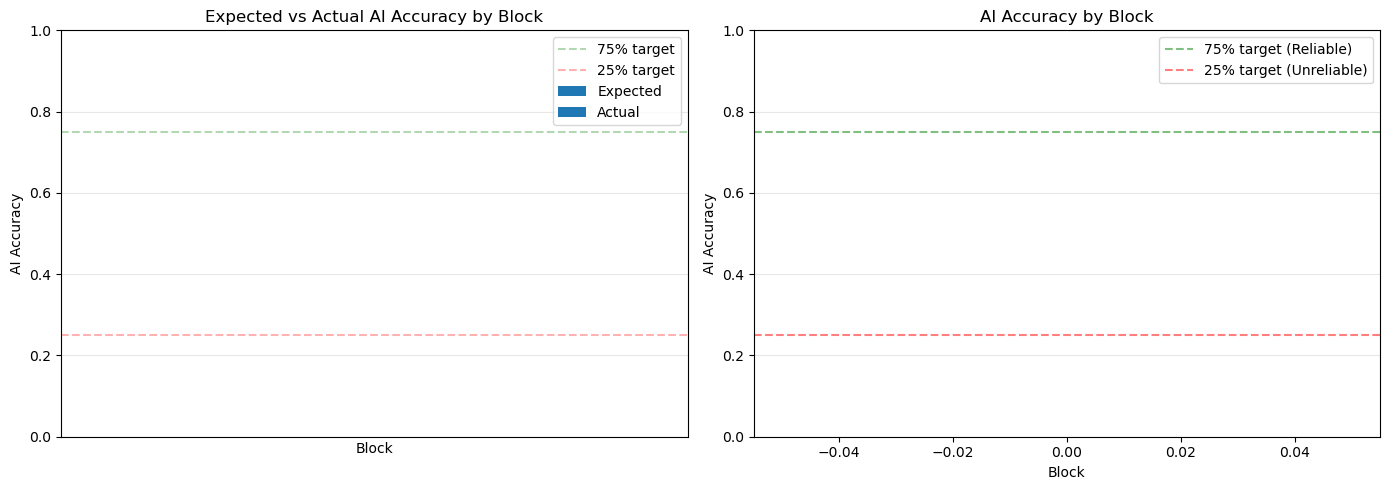

In [ ]:
# Create a visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Bar chart comparing expected vs actual
blocks = sorted(block_accuracy.keys())
expected_values = [expected.get(b, None) for b in blocks]
actual_values = [block_accuracy[b]['accuracy'] for b in blocks]

x = np.arange(len(blocks))
width = 0.35

ax1.bar(x - width/2, expected_values, width, label='Expected', alpha=0.7, color='gray')
ax1.bar(x + width/2, actual_values, width, label='Actual', alpha=0.7, color='steelblue')

ax1.set_xlabel('Block')
ax1.set_ylabel('AI Accuracy')
ax1.set_title('Expected vs Actual AI Accuracy by Block')
ax1.set_xticks(x)
ax1.set_xticklabels(blocks)
ax1.set_ylim([0, 1])
ax1.axhline(y=0.75, color='green', linestyle='--', alpha=0.3, label='75% target')
ax1.axhline(y=0.25, color='red', linestyle='--', alpha=0.3, label='25% target')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Detailed breakdown
block_nums = list(blocks)
accuracies = [block_accuracy[b]['accuracy'] for b in blocks]
colors = ['green' if expected.get(b, 0) == 0.75 else 'red' for b in blocks]

bars = ax2.bar(block_nums, accuracies, color=colors, alpha=0.7)
ax2.axhline(y=0.75, color='green', linestyle='--', alpha=0.5, label='75% target (Reliable)')
ax2.axhline(y=0.25, color='red', linestyle='--', alpha=0.5, label='25% target (Unreliable)')
ax2.set_xlabel('Block')
ax2.set_ylabel('AI Accuracy')
ax2.set_title('AI Accuracy by Block')
ax2.set_ylim([0, 1])
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.1%}\n({block_accuracy[blocks[i]]["correct_trials"]}/{block_accuracy[blocks[i]]["total_trials"]})',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics
print("="*60)
print("SUMMARY STATISTICS")
print("="*60)

reliable_blocks = [1, 4]
unreliable_blocks = [2, 3, 5]

reliable_accuracies = [block_accuracy[b]['accuracy'] for b in reliable_blocks if b in block_accuracy]
unreliable_accuracies = [block_accuracy[b]['accuracy'] for b in unreliable_blocks if b in block_accuracy]

print(f"\nReliable Blocks (1, 4) - Expected: 75%")
print(f"  Mean accuracy: {np.mean(reliable_accuracies):.1%}")
print(f"  Individual: {[f'{acc:.1%}' for acc in reliable_accuracies]}")

print(f"\nUnreliable Blocks (2, 3, 5) - Expected: 25%")
print(f"  Mean accuracy: {np.mean(unreliable_accuracies):.1%}")
print(f"  Individual: {[f'{acc:.1%}' for acc in unreliable_accuracies]}")

print(f"\nOverall:")
print(f"  All blocks mean: {np.mean(actual_values):.1%}")
print(f"  Expected mean: {np.mean([v for v in expected_values if v is not None]):.1%}")

# Check if accuracy is within acceptable range (±10%)
print("\n" + "="*60)
print("ACCURACY CHECK (within ±10% of target)")
print("="*60)
all_good = True
for block_num in sorted(block_accuracy.keys()):
    actual = block_accuracy[block_num]['accuracy']
    exp = expected.get(block_num, None)
    if exp:
        diff = abs(actual - exp)
        is_good = diff < 0.1
        status = "✓ PASS" if is_good else "✗ FAIL"
        all_good = all_good and is_good
        print(f"Block {block_num}: {status} (target: {exp:.0%}, actual: {actual:.1%}, diff: {diff:.1%})")

if all_good:
    print("\n✓ All blocks are within acceptable range!")
else:
    print("\n✗ Some blocks are outside acceptable range (±10%)")

SUMMARY STATISTICS

Reliable Blocks (1, 4) - Expected: 75%
  Mean accuracy: nan%
  Individual: []

Unreliable Blocks (2, 3, 5) - Expected: 25%
  Mean accuracy: nan%
  Individual: []

Overall:
  All blocks mean: nan%
  Expected mean: nan%

ACCURACY CHECK (within ±10% of target)

✓ All blocks are within acceptable range!


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
